In [1]:
import numpy as np
from scipy.io.wavfile import write
from pylab import*
from scipy.io import wavfile
%pylab inline
from IPython.display import Audio
import wave
import pyaudio  

Populating the interactive namespace from numpy and matplotlib


/Users/ianlee/anaconda3/lib/python3.4/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'linalg', 'power', 'fft', 'info', 'draw_if_interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
a = wavfile.read("shivers.wav")
shivers = numpy.array(a[1],dtype=float)
b = wavfile.read("home.wav")
home = numpy.array(b[1],dtype=float)

In [3]:
frames = len(shivers)

In [4]:
shivers[frames*5//10:frames*6//10].shape

(1375032, 2)

In [5]:
shivers_sample = shivers[frames*6//10:frames*7//10].T * 0.5

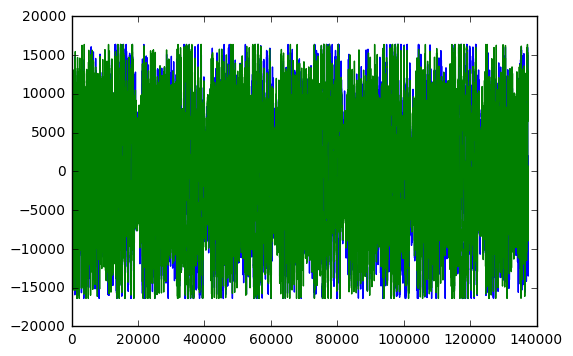

In [6]:
plt.plot(shivers[frames*66//100:frames*67//100] *0.5)

In [7]:
def quilt_random(sample, outsize, patchsize, patchnum=200):
    length = len(sample)
    demo = np.zeros(outsize)
    for i in range(0, outsize, patchsize):
        if i + patchsize > outsize:
            demo[i:i+patchsize] = 0
            break
        
        x = np.random.randint(length-patchsize)
        patch = sample[x:x+patchsize, 0]
        demo[i:i+patchsize] = patch
    return demo

In [ ]:
test = quilt_random(shivers, 1000000, 20000)

In [ ]:
plt.plot(test)

In [ ]:
Audio(test, rate=44100)

In [ ]:
home_test = quilt_random(home, 1000000, 20000)

In [ ]:
Audio(home_test, rate=44100)

In [ ]:
def quilt_simple(sample, outsize, patchsize, overlap, tol, patchnum=200):
    length = len(sample)
    demo = np.zeros(outsize)
    
    patches = []
    for i in range(patchnum):
        x = np.random.randint(length-patchsize)
        while  np.sum(np.abs(sample[x:x+patchsize, 0])) < 300992659:
            x = np.random.randint(length-patchsize)

        patches.append(sample[x:x+patchsize, 0])
        
    demo[:patchsize] = patches[0]
        
    patches = np.array(patches)
    

        
    for i in range(patchsize-overlap, outsize, patchsize-overlap):
        print(i)
        if i + patchsize > outsize:
            demo[i+overlap:outsize] = 0
            break
        mask = np.zeros(outsize)
        mask[i:i+overlap] = 0.01
        scores = []
        np.random.shuffle(patches)
        for p in patches:
            
            patch = np.zeros(outsize)
            patch[i:i+patchsize] = p
            scores.append(np.sum(((demo - patch)*mask)**2))
            
        min_score = min(scores)
        for k, score in enumerate(scores):
            if score < min_score * (1+tol):
                break
                

        demo[i:i+patchsize] = patches[k]
        print(np.sum(np.abs(patches[k])))
        
    return demo

In [ ]:
test2 = quilt_simple(shivers, 500000, 40000, 10000, 0.2, 500)

In [ ]:
plt.plot(test2)

In [ ]:
Audio(test2, rate=44100)

In [10]:
def texture_transfer(source, target, outsize, patchsize, overlap, tol, patchnum=200, alpha = 0.5):
    length = len(source)
    demo = np.zeros(outsize)
    target = target[length//2:,0][:outsize]
    
    patches = []
    for i in range(patchnum):
        x = np.random.randint(length-patchsize)
#         while  np.sum(np.abs(source[x:x+patchsize, 0])) < 300992659:
#             x = np.random.randint(length-patchsize)

        patches.append(source[x:x+patchsize, 0])
        
    demo[:patchsize] = patches[0]
        
    patches = np.array(patches)
    

        
    for i in range(patchsize-overlap, outsize, patchsize-overlap):
        print(i)
        if i + patchsize > outsize:
            demo[i+overlap:outsize] = 0
            break
        mask = np.zeros(outsize)
        mask[i:i+overlap] = 0.01
        scores = []
        np.random.shuffle(patches)
        
        demo_frequencies = np.fft.fft(demo*mask)
        target_frequencies = np.fft.fft(target*mask)
        
        
        for p in patches:
            
            patch = np.zeros(outsize)
            patch[i:i+patchsize] = p
            patch_frequencies = np.fft.fft(patch*mask)

            demo_patch = (demo-patch)**2
            target_patch = (target - patch)**2
            
            scores.append(np.sum(demo_patch) * alpha + (1-alpha)*np.sum(target_patch))
            
        min_score = min(scores)
        for k, score in enumerate(scores):
            if score < min_score * (1+tol):
                break
                

        demo[i:i+patchsize] = patches[k]
        print(np.sum(np.abs(patches[k])))
        
    return demo

In [11]:
test3 = texture_transfer(shivers, home, 500000, 40000, 10000, 0.2, 500)

30000
243841497.0
60000
277577544.0
90000
429193856.0
120000
260999618.0
150000
286162243.0
180000
419660701.0
210000
166154025.0
240000
319658188.0
270000
267891424.0
300000
370657807.0
330000
95111806.0
360000
258256634.0
390000
257790314.0
420000
439233206.0
450000
439233206.0
480000


In [12]:
Audio(test3, rate=44100)

In [ ]:
Audio(home[:,0], rate=44100)

In [ ]:
home.shape

In [ ]:
shivers.shape

In [ ]:
np.fft.fft(home[:1000,0])